# Exploratory Data Analysis: Netflix Recommender System 

This notebook explores the MovieLens 20M dataset to understand user-item interaction patterns, sparsity, and behavioral characteristics that inform the design of recommendation models. 

The goal of this analysis is to: 
- Understand the structure of implicit feedback data 
- Identify challenges such as sparsity and popularity bias 
- Motivate modeling and evaluation choices used later in this project 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use("seaborn-v0_8") 

## Dataset Loading 

I am using the MovieLens 20M dataset and treating ratings ≥ 4 as implicit positive interactions. This reflects real-world systems where explicit negative feedback is rarely observed.

In [3]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
#print("Dataset shape:")
#ratings.shape 

## Converting to Implicit Feedback 

In recommendation systems, explicit ratings are often transformed into implicit signals such as clicks, views, or likes. Here, we treat ratings greater than or equal to 4 as positive interactions. 

In [5]:
implicit_ratings = ratings[ratings["rating"] >= 4.0].copy() 
implicit_ratings.shape 

(9995410, 4)

## Dataset Statistics 

Understanding the scale of the dataset helps determine appropriate modeling choices and highlights challenges such as sparsity.

In [6]:
n_users = implicit_ratings["userId"].nunique() 
n_items = implicit_ratings["movieId"].nunique() 
n_interactions = len(implicit_ratings)

density = n_interactions / (n_users * n_items) 

n_users, n_items, n_interactions, density 

(138287, 20720, 9995410, 0.0034884259368484203)

### Interpretation

- The interaction matrix is extremely sparse 
- Most users interact with a very small fraction of items
- This sparsity motivates collaborative filtering and embedding-based models 

## User Activity Distribution

We examine how many interactions each user has. This helps identify: 
- Power users 
- Long-tail users 
- Cold-start challenges 

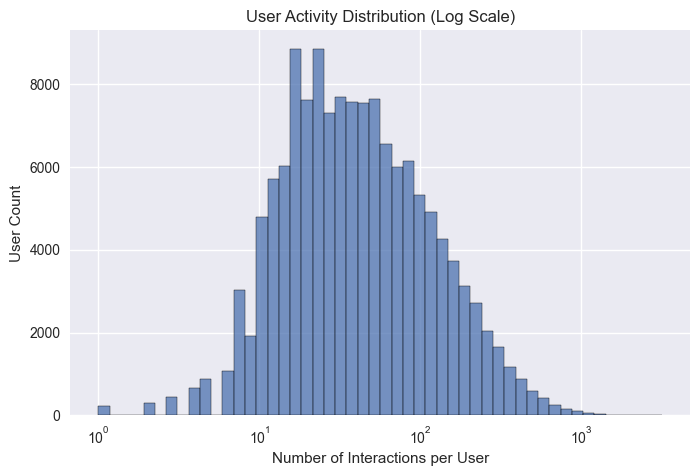

In [7]:
user_activity = implicit_ratings.groupby("userId").size() 

plt.figure(figsize=(8,5)) 
sns.histplot(user_activity, bins=50, log_scale=True) 
plt.xlabel("Number of Interactions per User") 
plt.ylabel("User Count") 
plt.title("User Activity Distribution (Log Scale)") 
plt.show() 

### Interpretation

- A small number of users account for many interactions 
- Most users have realtively few interactions 
- Models must generalize well under limited user history

## Item Popularity Distribution

We now examine how requently each item appears in the dataset. 
This reveals popularity bias and motivates popularity baselines. 

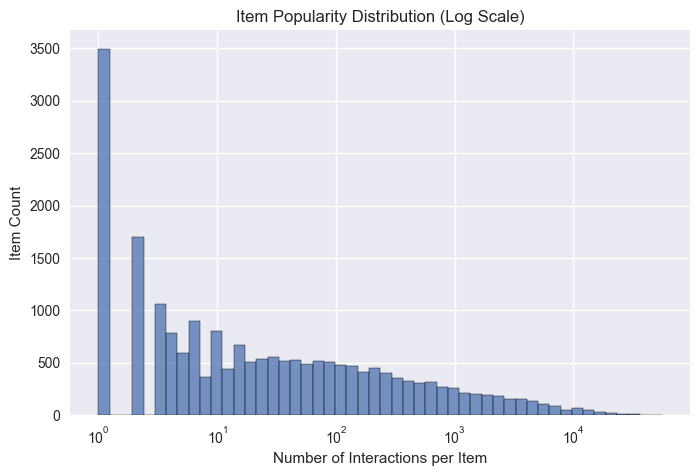

In [8]:
item_popularity = implicit_ratings.groupby("movieId").size() 

plt.figure(figsize=(8,5)) 
sns.histplot(item_popularity, bins=50, log_scale=True) 
plt.xlabel("Number of Interactions per Item") 
plt.ylabel("Item Count") 
plt.title("Item Popularity Distribution (Log Scale)") 
plt.show() 

### Interpretation 

- A small subset of items dominate interactions 
- Popularity-based recommenders are surprsingly strong baselines 
- Personalized models must outperform popularity to be meaningful

## Interaction Matrix Sparsity 

We visualize a small slice of the user-item interaction matrix to illustrate sparsity

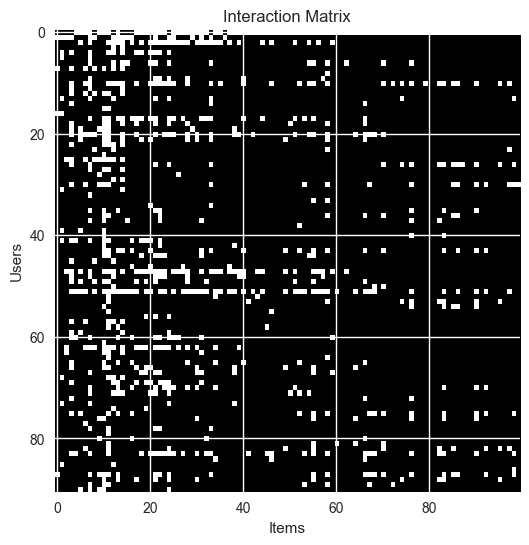

In [9]:
sample_users = implicit_ratings["userId"].unique()[:100] 
sample_items = implicit_ratings["movieId"].unique()[:100] 

matrix = implicit_ratings[
    implicit_ratings["userId"].isin(sample_users) &
    implicit_ratings["movieId"].isin(sample_items)
]

pivot = matrix.pivot_table(
    index="userId",
    columns="movieId",
    values="rating",
    fill_value=0
)

plt.figure(figsize=(6,6)) 
plt.imshow(pivot > 0, aspect="auto", cmap="gray") 
plt.title("Interaction Matrix") 
plt.xlabel("Items") 
plt.ylabel("Users") 
plt.show() 

### Interpretation

- The matrix is overwhelmingly empty
- Dense Matrix methods are infeasible 
- Factorization and neural embedding methods are well-suited 

## Implications for Evaluation 

Because users only see the top ranked items: 
- Acuracy or RMSE is not appropriate 
- Ranking-based metrics better reflect user experience 

We therefore use: 
- Precision@K 
- Recall@K 
- NCDG@K 

## Summary 

Key insights from EDA: 
- Extreme sparsity dominates the data 
- Popularity bias is strong 
- User interaction histories are short 
- Ranking-based evaluation is essential 

These findings directly inform the modeling and evaluation strategies used in the rest of this project. 